### Loading Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import pandas_profiling as pp
#import etsy_py
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import kurtosis

from numpy import arange
from sklearn.feature_selection import VarianceThreshold 
from matplotlib import pyplot


from sklearn.manifold import TSNE



### Load Data File

In [3]:
 creditcard_df= pd.read_csv('./Data/cc_info.csv')

### Step for Data Inspections

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
creditcard_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [8]:
creditcard_df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [10]:
missing_value(creditcard_df)

In [11]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        844.452407          0.153715    11.517318  
std     2895.063757       2332.897280          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        299.351881          0.000000    12.000000  
75%     1901.134317        788.713501          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Data Exploration

### Visualization of Features Distribution

/opt/anaconda2/envs/HSD/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


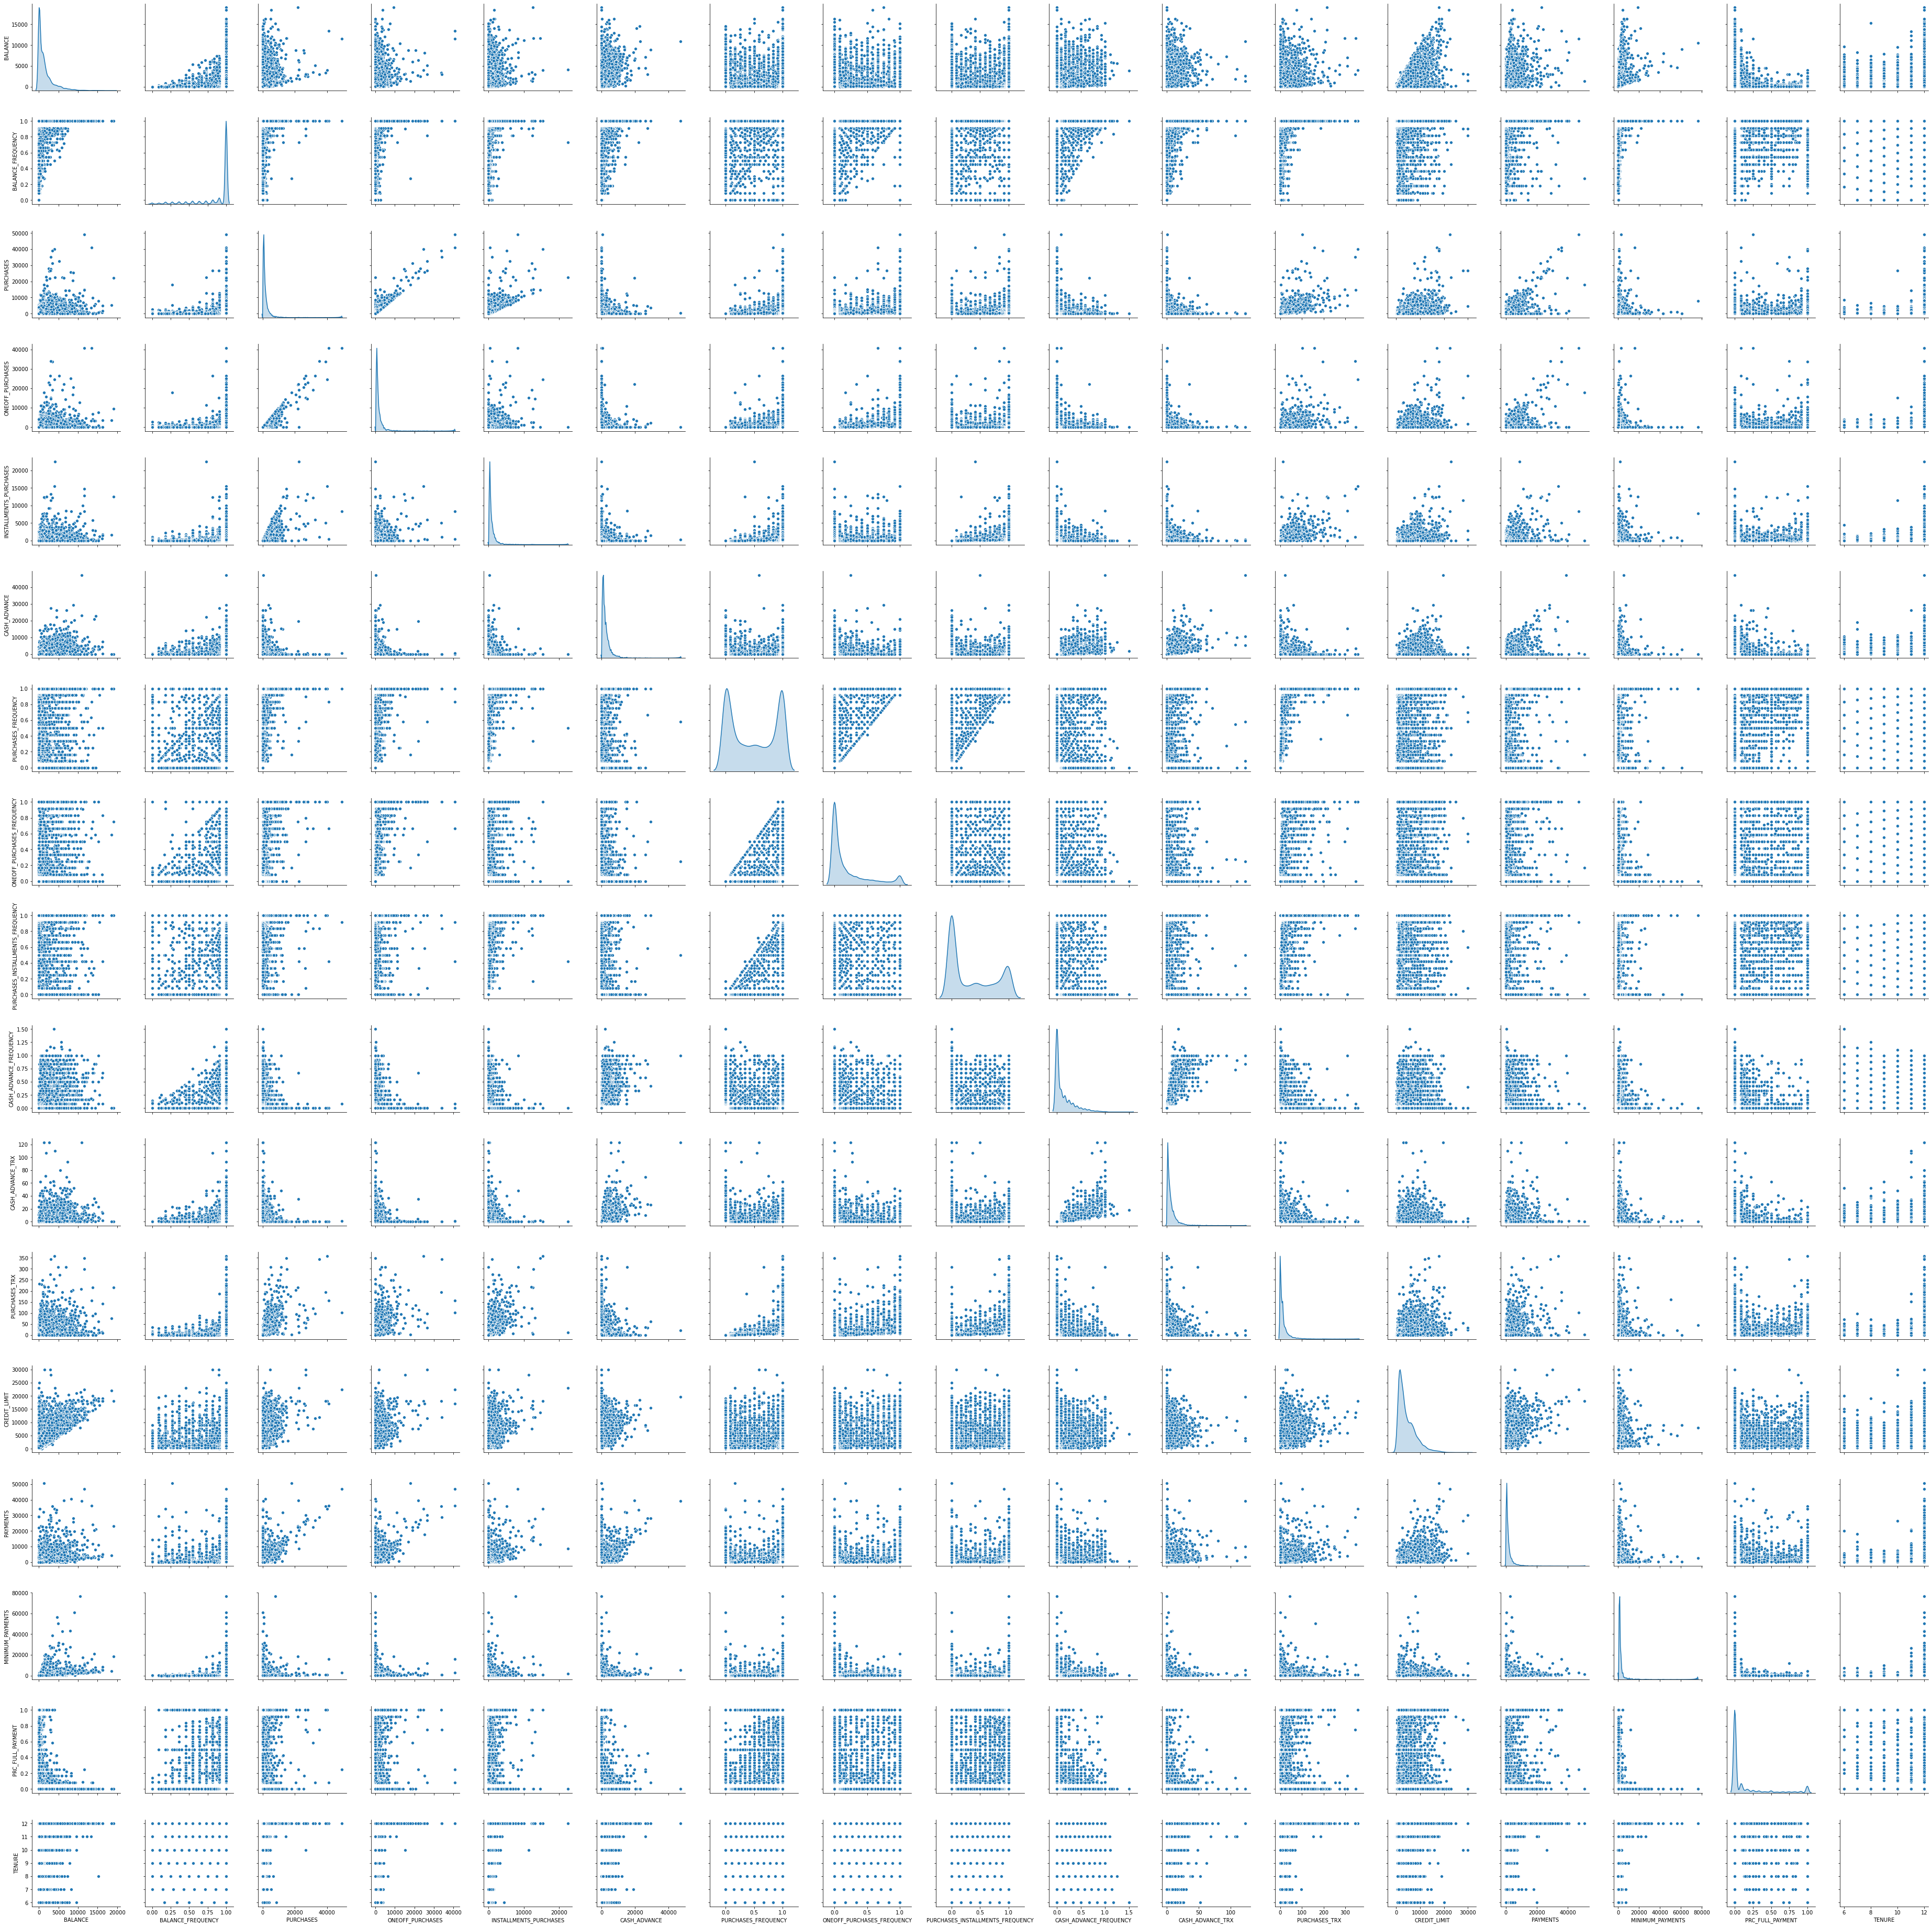

In [12]:
sns.pairplot(creditcard_df.loc[:, "BALANCE": "TENURE"], diag_kind="kde", height=3)


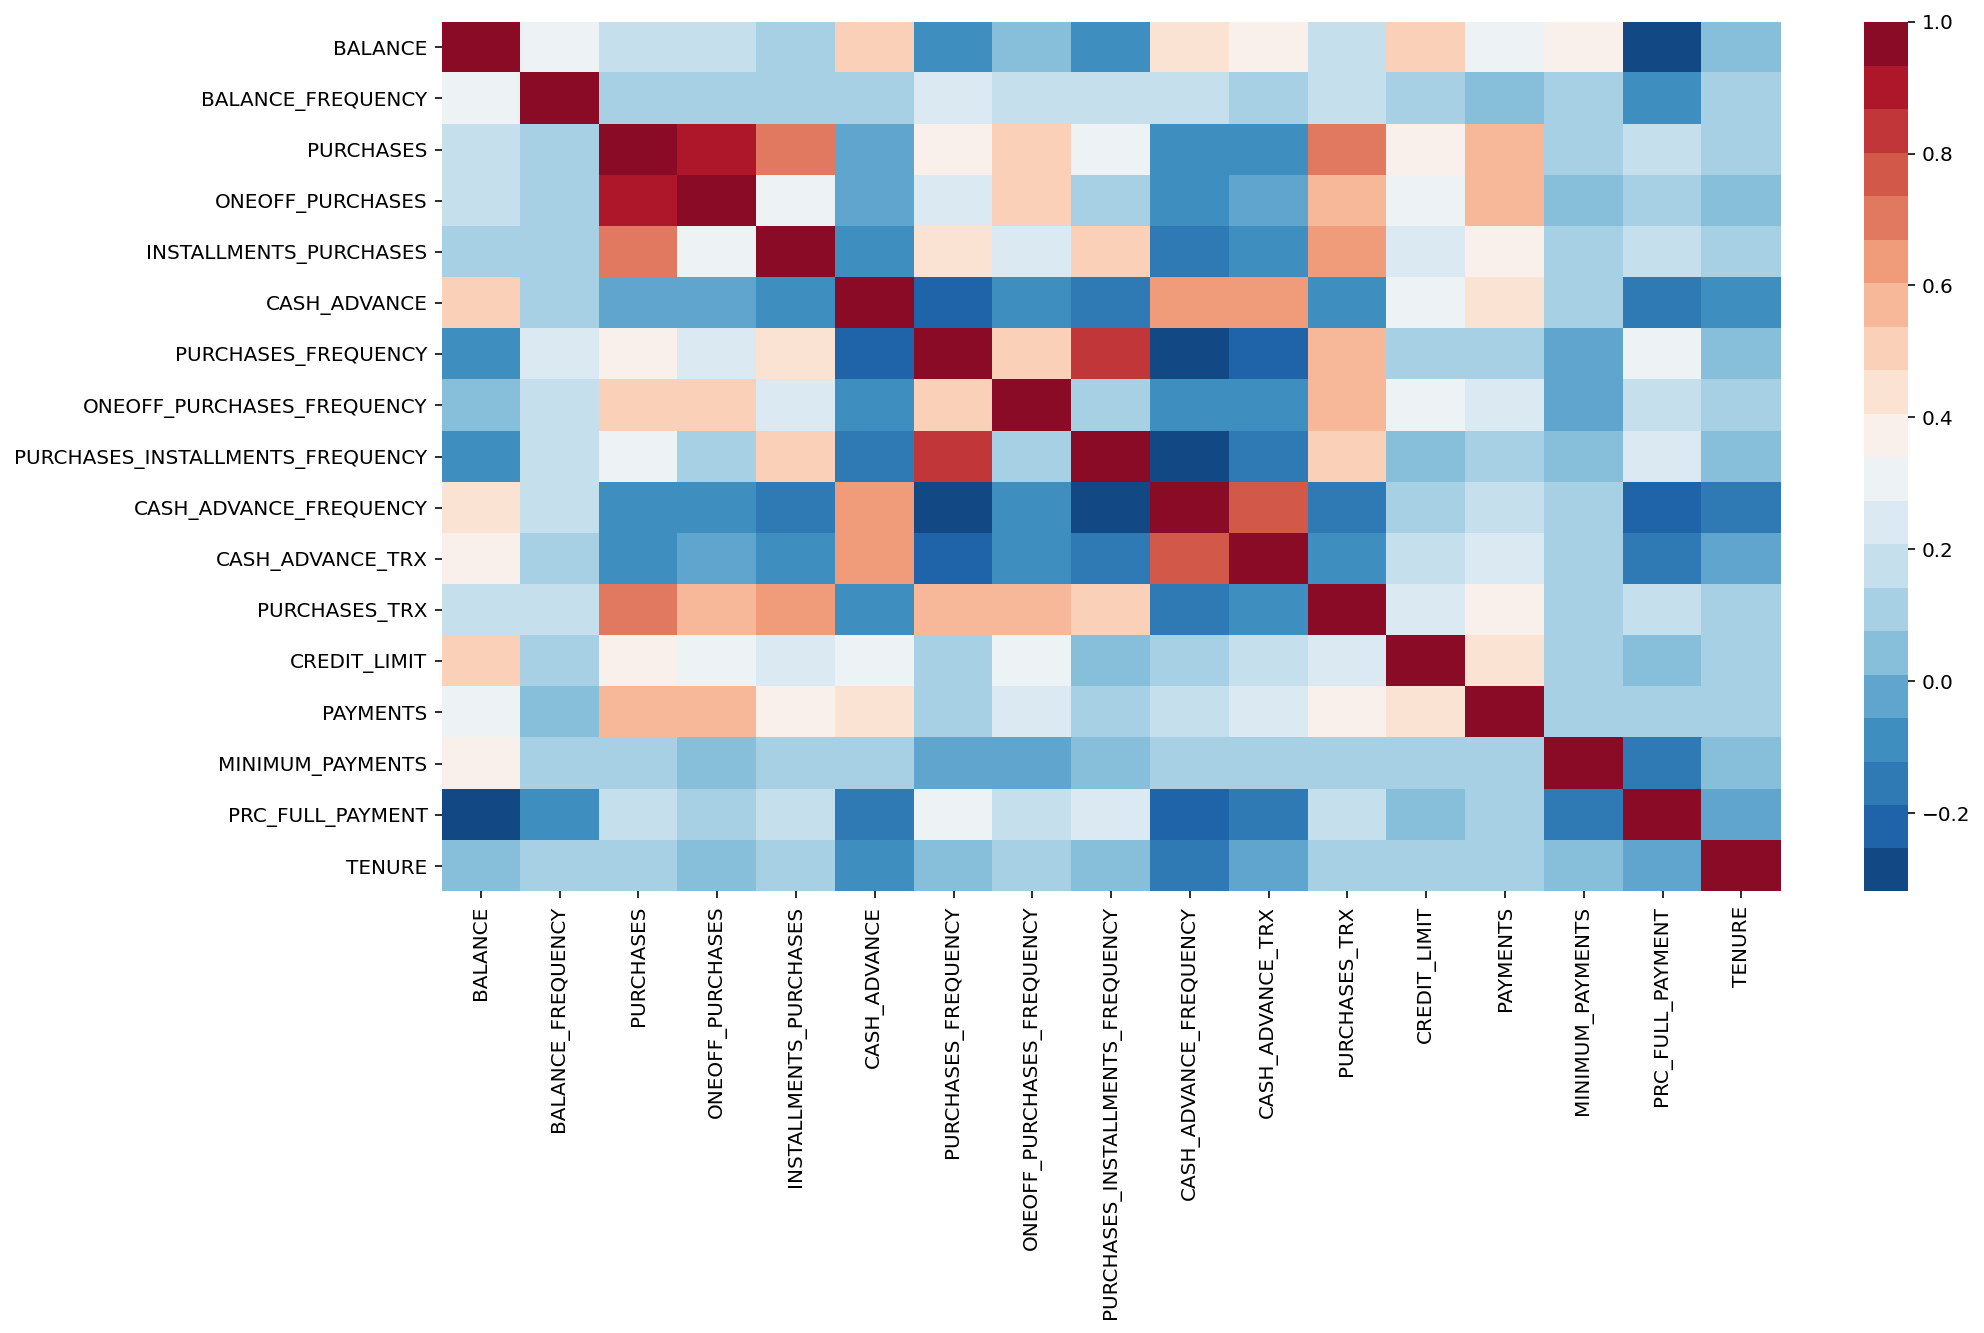

In [13]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# create correlation in dataframe
corr = creditcard_df[creditcard_df.columns[1:]].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 20));

### Removing correlated features

In [14]:
features_columns= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY',
                   'CASH_ADVANCE_FREQUENCY','PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'] 

### Boxplot of Features & Outliers Detection


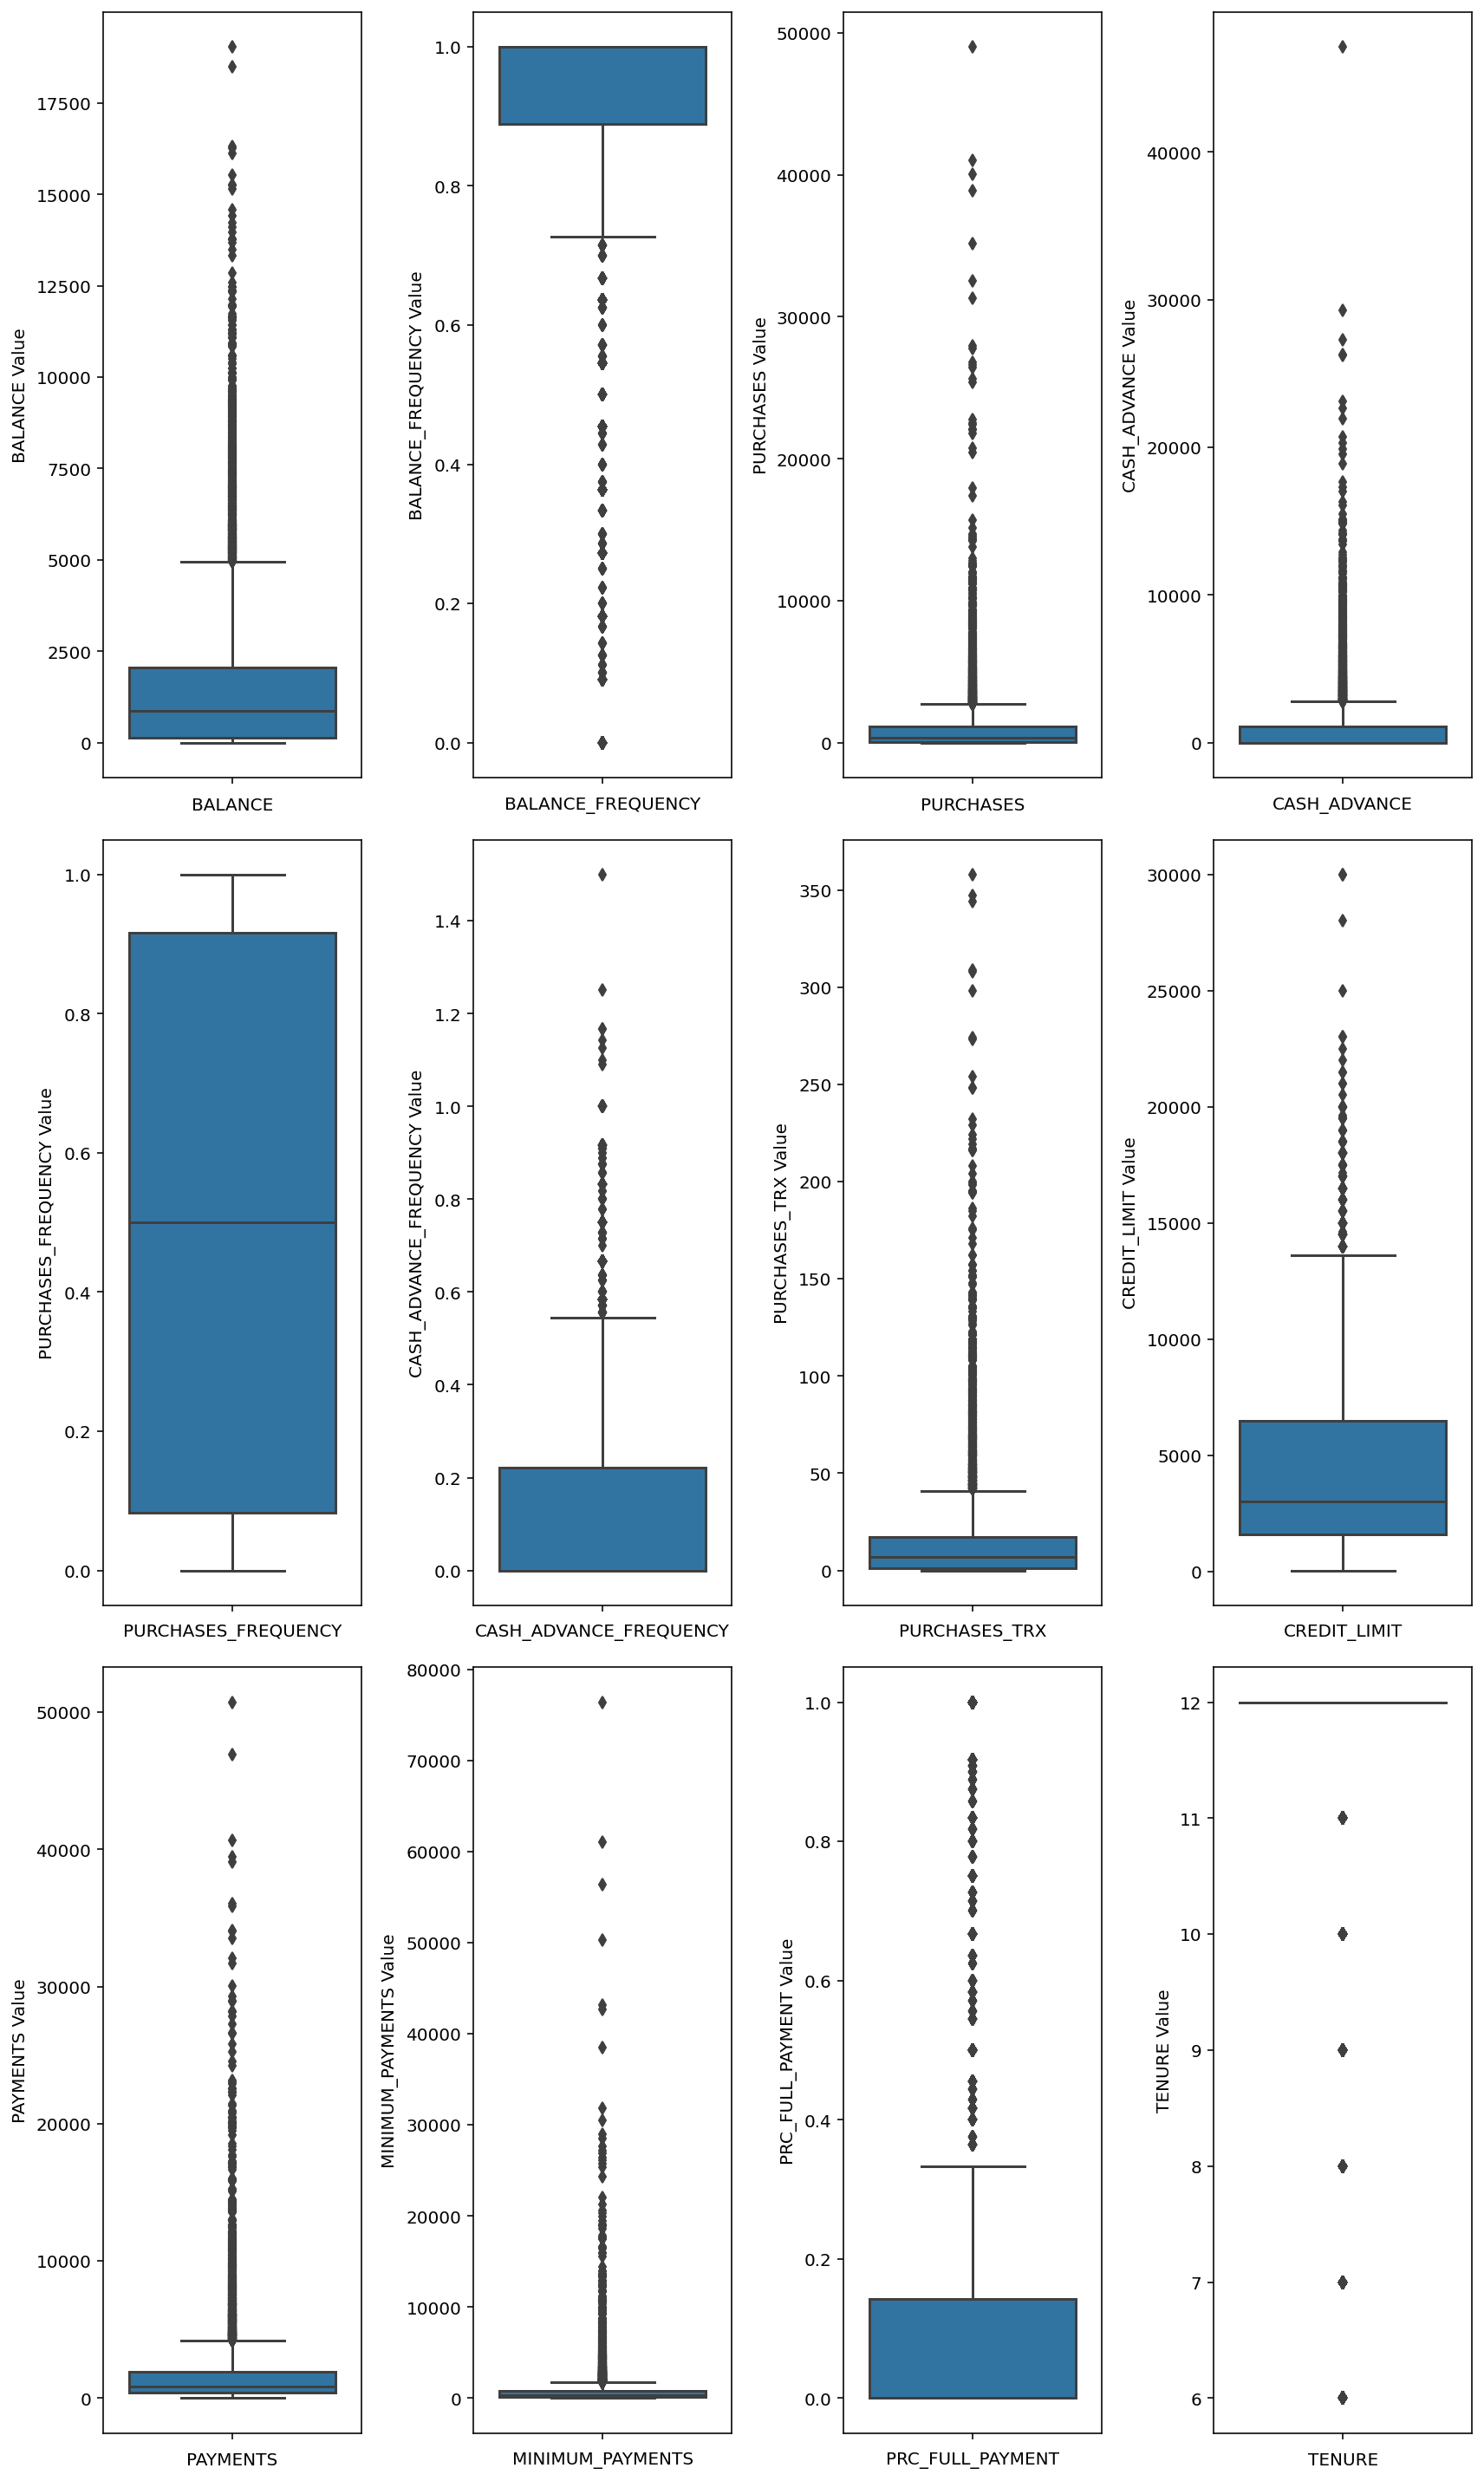

In [15]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(12,20), facecolor='white')
# plot numbering starts at 1, not 0
plot_number = 1

### 
for i in range(0, len(features_columns)):
    ax = plt.subplot(3, 4, plot_number)
    sns.boxplot(y=features_columns[i],
               data = creditcard_df,ax=ax,
               showfliers=True)
    plot_number = plot_number + 1
    plt.xlabel(features_columns[i])
    plt.ylabel(str(features_columns[i] + ' Value'))
    #plt.show()
plt.tight_layout()

### Detecting and Removing Outliers Appearing in more than One Feature

In [16]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        #print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        print("Data points considered outliers for the feature '{}':".format(i))
        df(creditcard_df[quartile_f])
    
    return lower_bound, upper_bound
#num_col = features_columns       
#outlier(creditcard_df,num_col)


In [43]:
outliers = []
# For each feature find the data points with extreme high or low values
for feature in features_columns:
    
   # Calculate quartile_1 (25th percentile of the data) for the given feature
    quartile_1 = np.percentile(creditcard_df[feature],25)
    
    # Calculate quartile_3 (75th percentile of the data) for the given feature
    quartile_3 = np.percentile(creditcard_df[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (quartile_3-quartile_1)
    
    # Display the outliers
    
    print("Data points considered outliers for the feature '{}':".format(feature))
    df_outlier = (creditcard_df[~((creditcard_df[feature] >= quartile_1 - step) & (creditcard_df[feature] <= quartile_3 + step))])
    #display(df_outlier.head())
    outliers_list = creditcard_df[~((creditcard_df[feature] >= quartile_1 - step) & (creditcard_df[feature] <= quartile_3 + step))].index.tolist()
    outliers.append(outliers_list)

Data points considered outliers for the feature 'BALANCE':
Data points considered outliers for the feature 'BALANCE_FREQUENCY':
Data points considered outliers for the feature 'PURCHASES':
Data points considered outliers for the feature 'CASH_ADVANCE':
Data points considered outliers for the feature 'PURCHASES_FREQUENCY':
Data points considered outliers for the feature 'CASH_ADVANCE_FREQUENCY':
Data points considered outliers for the feature 'PURCHASES_TRX':
Data points considered outliers for the feature 'CREDIT_LIMIT':
Data points considered outliers for the feature 'PAYMENTS':
Data points considered outliers for the feature 'MINIMUM_PAYMENTS':
Data points considered outliers for the feature 'PRC_FULL_PAYMENT':
Data points considered outliers for the feature 'TENURE':


In [18]:
# Detecting outliers that appear in more than one feature
seen = {}
dupes = []

for outliers_list in outliers:
    for index in outliers_list:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] ==1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
len(dupes)

2682

In [19]:
# Removing outliers  
good_data = creditcard_df.drop(dupes, axis=0).reset_index(drop=True)

In [20]:
# Size of Data After Outliers Removal
print("Size of data after outliers removal:", len(good_data))

Size of data after outliers removal: 6268


### Box plot Inspection After Removing Outliers

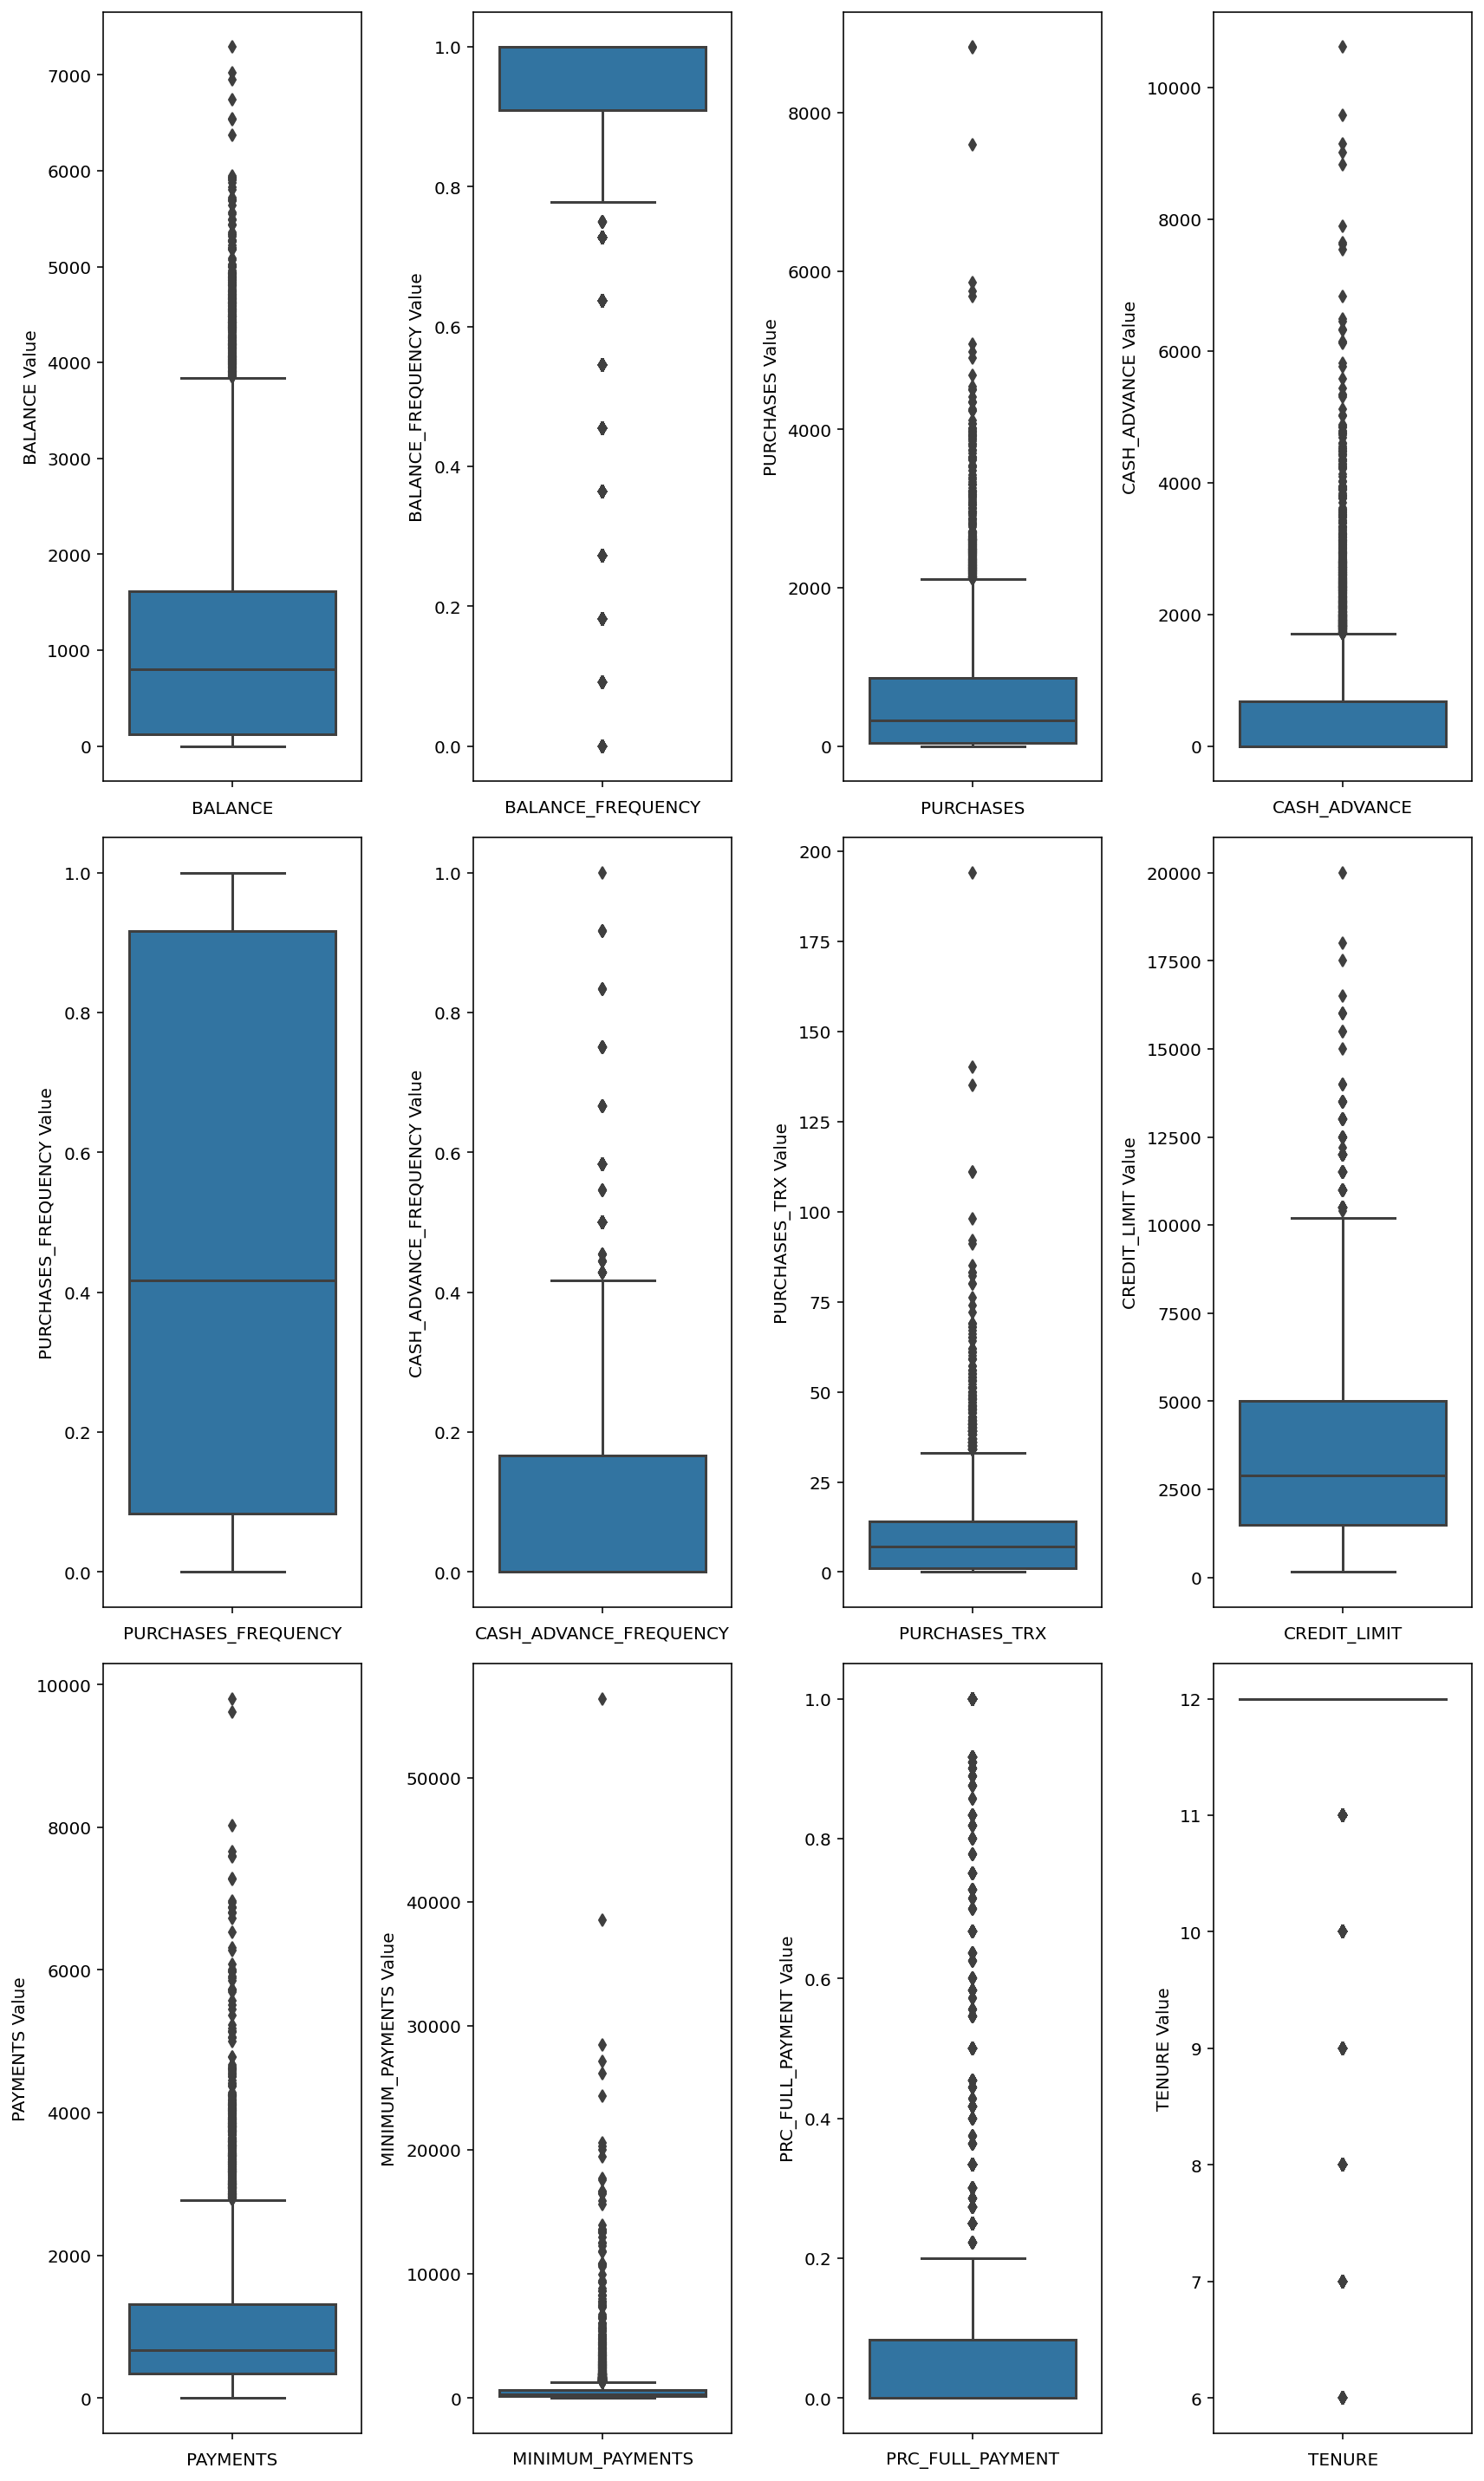

In [21]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(12,20), facecolor='white')
# plot numbering starts at 1, not 0
plot_number = 1


for i in range(0, len(features_columns)):
    ax = plt.subplot(3, 4, plot_number)
    sns.boxplot(y=features_columns[i],
               data = good_data,ax=ax,
               showfliers=True)
    plot_number = plot_number + 1
    plt.xlabel(features_columns[i])
    plt.ylabel(str(features_columns[i] + ' Value'))
    #plt.show()
plt.tight_layout()

## Data Pre-Processing

### Features Selection: VarianceThreshold Method to Remove features with Low Variance 

In [100]:
def variance_threshold_selector(df, col):
    data = df[col].values
    #X = data[:,:]
    X = data[:, 1:-1]
    #X = data[:,1:]
    
    print(X.shape)
    # define thresholds to check
    thresholds = arange(0.0, 0.55, 0.05)
    # apply transform with each threshold
    results = list()
    for t in thresholds:
        # define the transform
        transform = VarianceThreshold(threshold=t)
        # transform the input data
        X_sel = transform.fit_transform(X)
        # determine the number of input features
        n_features = X_sel.shape[1]
        print('>Threshold=%.3f, Features=%d' % (t, n_features)) # store the result
        results.append(n_features)
        # plot the threshold vs the number of selected features
    pyplot.plot(thresholds, results) 
    pyplot.show()

    return df[df.columns[transform.get_support(indices=True)]]
    
    


In [101]:
# A Plot of the number of features selected for a given variance

(6268, 10)
>Threshold=0.000, Features=10
>Threshold=0.050, Features=8
>Threshold=0.100, Features=7
>Threshold=0.150, Features=7
>Threshold=0.200, Features=6
>Threshold=0.250, Features=6
>Threshold=0.300, Features=6
>Threshold=0.350, Features=6
>Threshold=0.400, Features=6
>Threshold=0.450, Features=6
>Threshold=0.500, Features=6


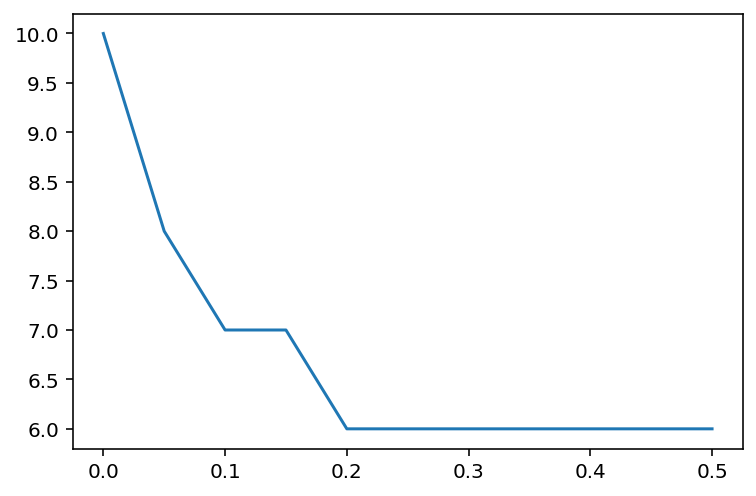

In [102]:
df_var = variance_threshold_selector(good_data,features_columns)

### Visual Inspection of the Features Selected (by the VarianceThreshold Method)

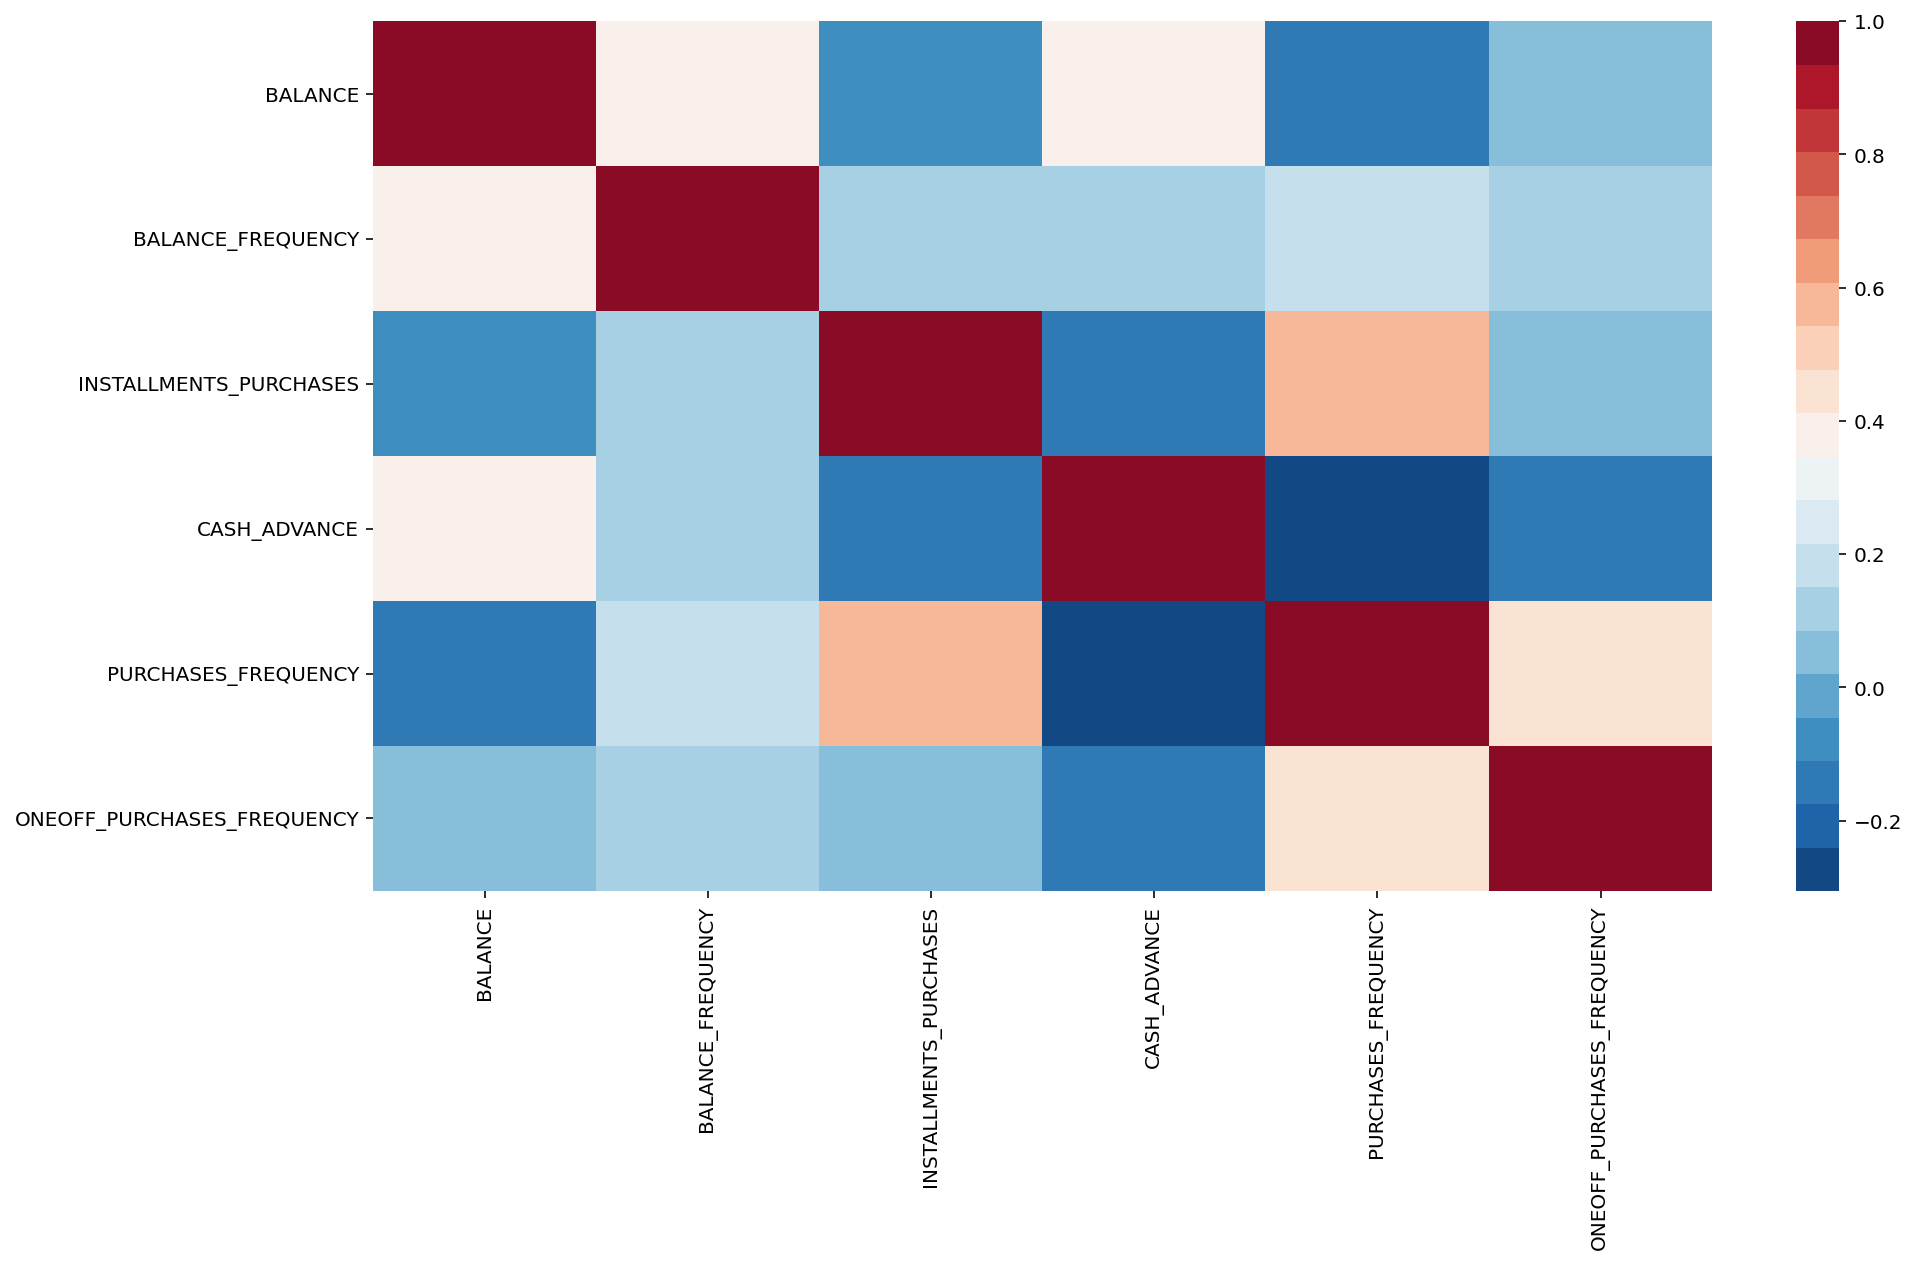

In [103]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# create correlation in dataframe
#corr = df_var[df_var.columns[:]].corr()
corr = df_var[df_var.columns].corr()


plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 20));

### Features Transformation: Rescaling

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#X = good_data[features_columns].values
X = df_var.values
#scaler = Normalizer()
#scaler =StandardScaler()
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_scaled = scaler.transform(X)

### Features Reduction: Principal Component Analysis (PCA)

In [121]:
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)


PCA(n_components=6)

In [106]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

def pca_results(good_data, pca, col):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data[col].keys()))
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (26,10))
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.10, ax.get_ylim()[1] + 0.10, "Explained Variance\n  %.3f"%(ev))
        # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

Explained Variance  BALANCE  BALANCE_FREQUENCY  \
Dimension 1              0.6737   0.8786             0.0001   
Dimension 2              0.2473  -0.4773            -0.0000   
Dimension 3              0.0790  -0.0133             0.0001   
Dimension 4              0.0000   0.0000            -0.1679   
Dimension 5              0.0000   0.0000            -0.5126   
Dimension 6              0.0000   0.0001            -0.8421   

             INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Dimension 1                 -0.0412        0.4757              -0.0001   
Dimension 2                 -0.1035        0.8726              -0.0001   
Dimension 3                  0.9938        0.1106               0.0005   
Dimension 4                  0.0004       -0.0001              -0.8006   
Dimension 5                  0.0002       -0.0000              -0.4276   
Dimension 6                 -0.0001        0.0000               0.4199   

             ONEOFF_PURCHASES_FREQUENCY  
Dimension 1                     -0.0000  
Dimension 2                     -0.0001  
Dimension 3                      0.0000  
Dimension 4                     -0.5753  
Dimension 5                      0.7446  
Dimension 6                     -0.3385

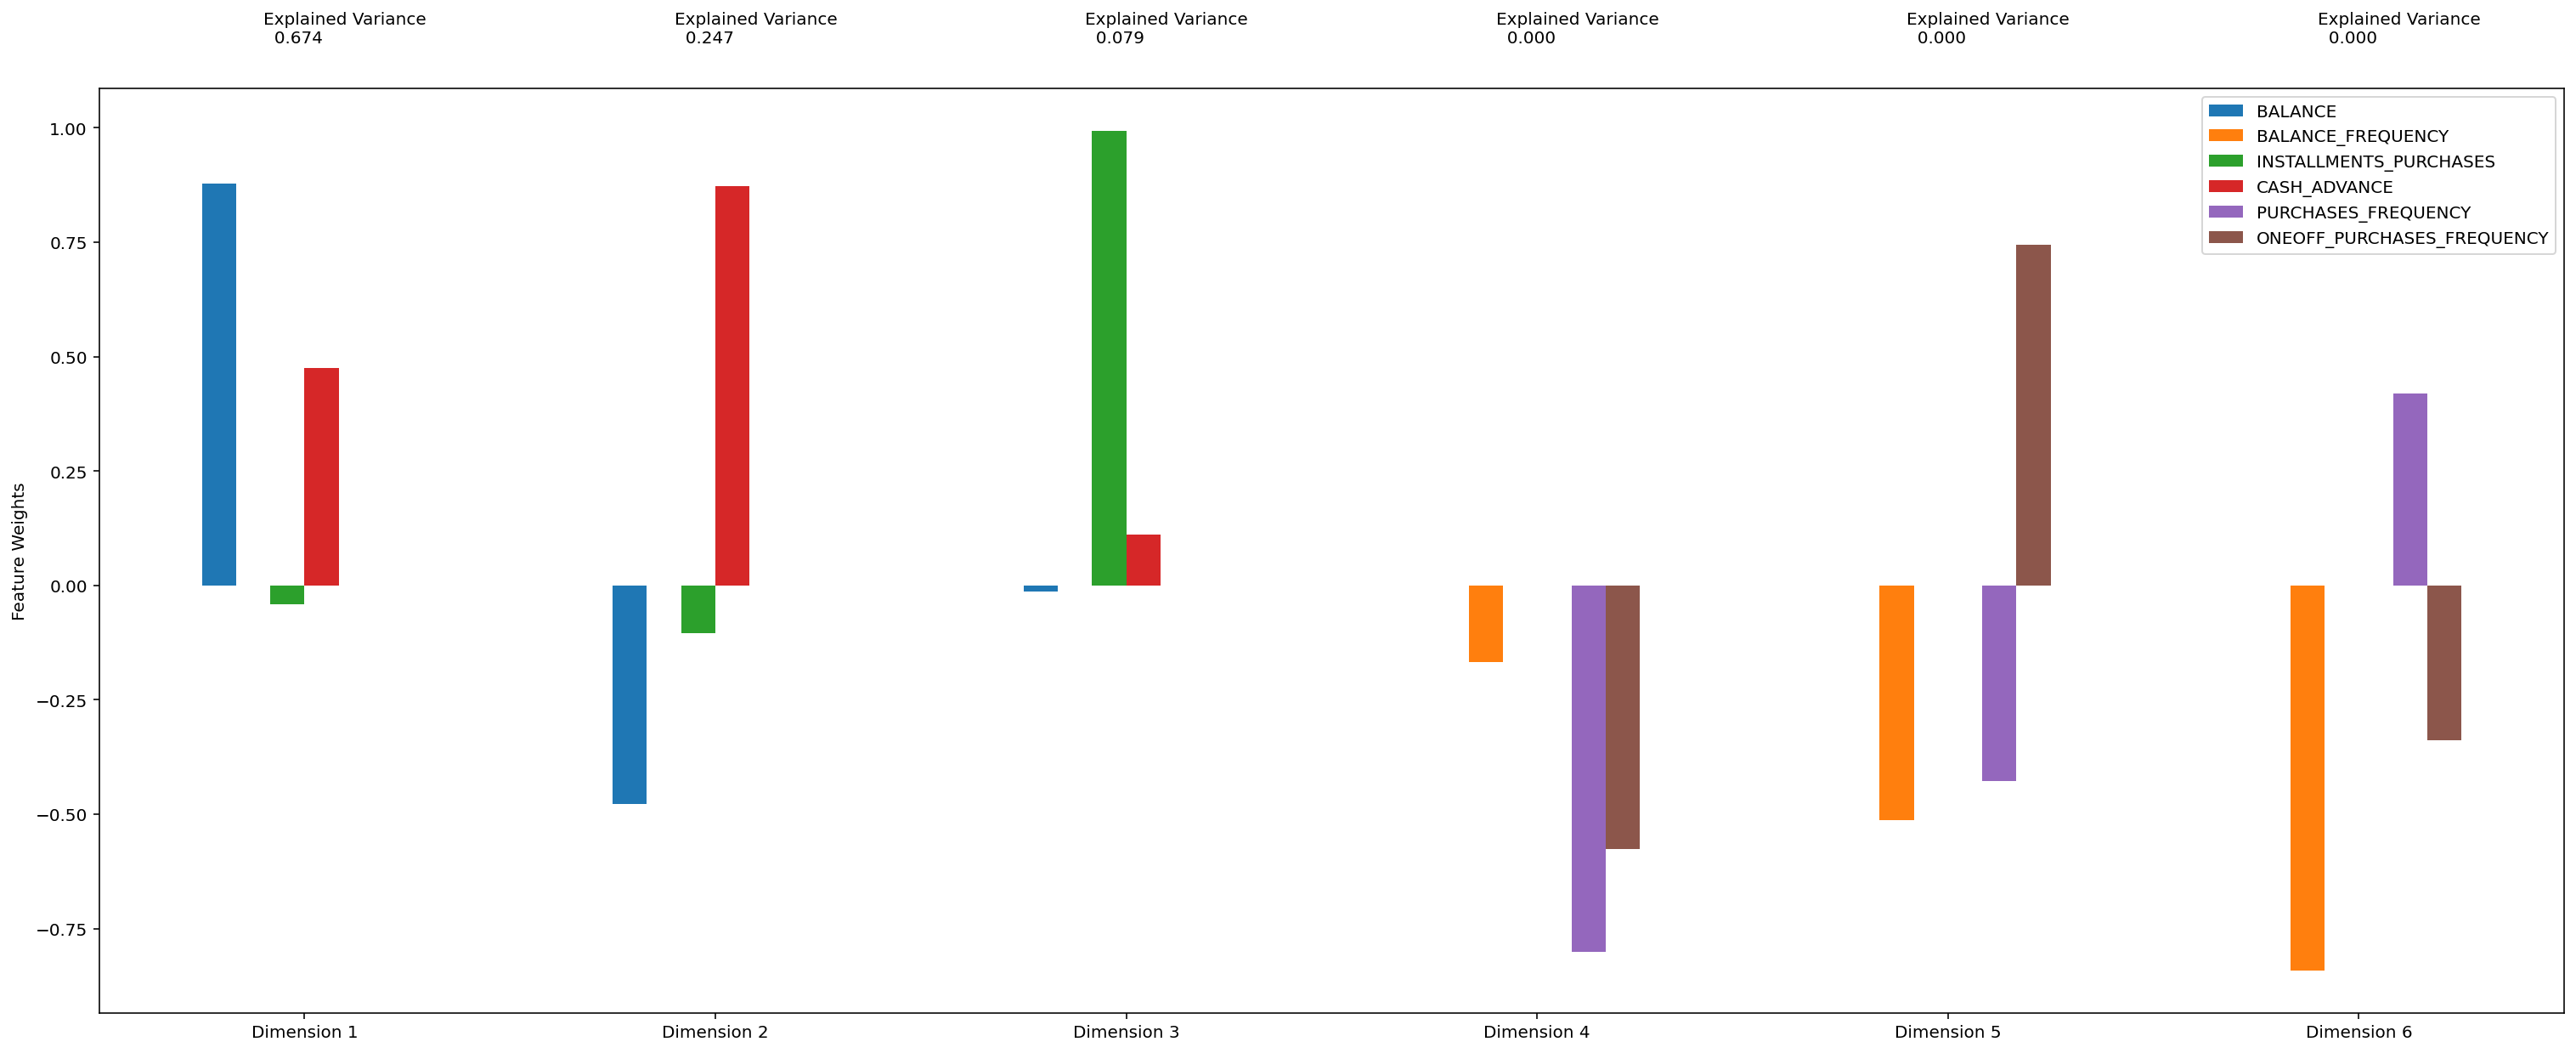

In [107]:
pca_results(df_var,pca, df_var.columns)

### Observations:
1. The first two Principal Components explain 71% of the variance
2. The first three Principal Components explain 91% of the variance


### Dimensionality
1. The Features well represented in **Dimension 1** are:
> - PURCHASE_FREQUENCY 
> - ONE_OFF_PURCHASE_FREQUENCY
2. The Features well represented in **Dimension 2** are: 
> - BALANCE_FREQUENCY 
> - ONE_OFF_PURCHASE_FREQUENCY 
> - BALANCE, PURCHASE_FREQUENCY
3. The Features well represented in **Dimension 3** are: 
> - BALANCE_FREQUENCY 
> - ONE_OFF_PURCHASE_FREQUENCY

### Features Reduction to Two Dimensions

In [135]:
pca_reduced = PCA(n_components=2)
pca_reduced.fit(X_scaled)

X_tf = pca_reduced.transform(X_scaled)
#X_tf = pca_reduced.transform(X)

In [136]:
reduced_data_df = pd.DataFrame(X_tf, columns = ['Dimension_1', 'Dimension_2'])

In [137]:
reduced_data_df.head()

Dimension_1  Dimension_2
0    -0.447618    -1.333372
1    -4.515768     2.917480
2     1.534081     1.773609
3    -1.099074    -0.919448
4    -0.702970    -0.416587

### Biplot Visualization

Text(0, 0.5, 'Second Principal Component')

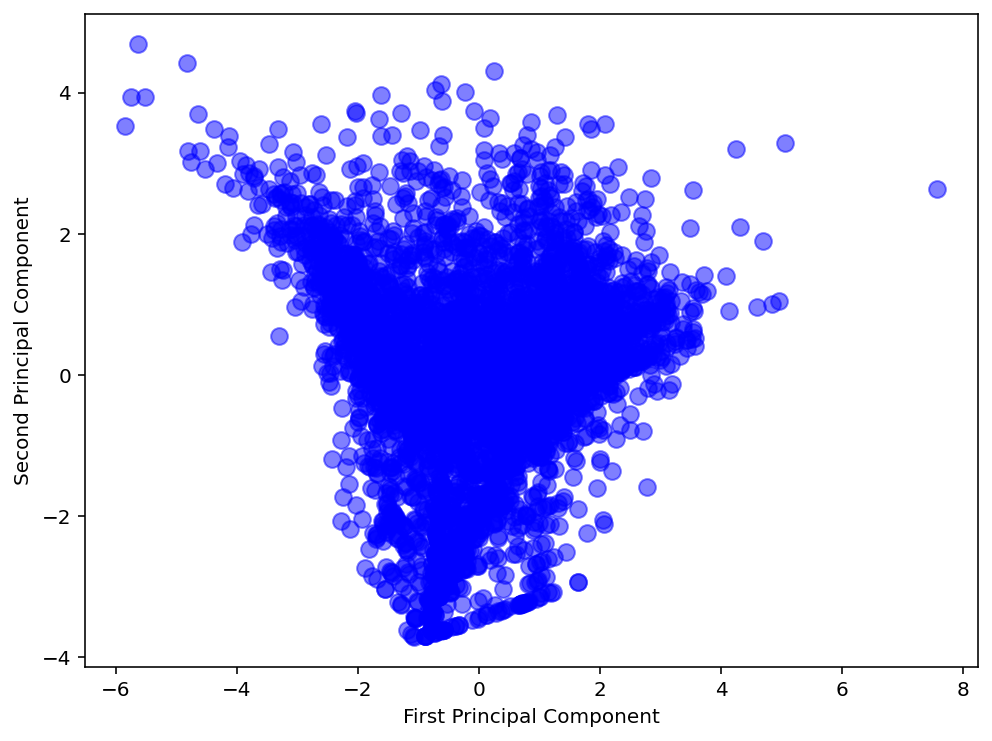

In [138]:
plt.figure(figsize=(8,6))
plt.scatter(X_tf[:,0], X_tf[:,1], facecolors='b', edgecolors='b', s=70, alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


## Clustering

### Use Gaussian Mixture Model (GMM) to Identify Segements of Customers

In [139]:
# Import the necessary libraries
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,11):
    
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(X_tf)

    # Predict the cluster for each data point
    preds = clusterer.predict(X_tf)

    # Find the cluster centers
    centers = clusterer.means_
    print('Cluster Center: ' + str(centers))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data_df, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))

Number of clusters: 2
Cluster Center: [[-1.07371702 -0.25806181]
 [ 1.10161789  0.26476763]]
Silhouette score is: 0.3945494226549429 

Number of clusters: 3
Cluster Center: [[-1.38766768  0.18253656]
 [ 1.10091715  0.21180264]
 [-0.68548305 -0.67647735]]
Silhouette score is: 0.35067365869643863 

Number of clusters: 4
Cluster Center: [[-0.39983518  1.65108618]
 [ 0.95078409  0.01960611]
 [-0.4229454  -2.43347855]
 [-1.27026329  0.03132518]]
Silhouette score is: 0.3987796198028731 

Number of clusters: 5
Cluster Center: [[ 0.4315559   1.29891346]
 [ 1.16744065 -0.00730998]
 [-0.39812991 -2.33813428]
 [-0.99266173 -0.149127  ]
 [-1.9723009   0.93394349]]
Silhouette score is: 0.39574562501725474 

Number of clusters: 6
Cluster Center: [[ 0.35339524  1.4098834 ]
 [ 1.89668444  0.45941702]
 [-0.41858086 -2.26703893]
 [-1.08525718 -0.1618143 ]
 [-2.01437153  1.17508664]
 [ 0.79124187 -0.1463544 ]]
Silhouette score is: 0.3699156918151901 

Number of clusters: 7
Cluster Center: [[ 0.16244625  

In [140]:
 clusterer = GaussianMixture(random_state=42, n_components=2)
clusterer.fit(X_tf)

# Predict the cluster for each data point
preds = clusterer.predict(X_tf)

# Find the cluster centers
centers = clusterer.means_
print('Cluster Center: ' + str(centers))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_df, preds)
scores[i] = score
print('Silhouette score is: ' + str(score), '\n')

Cluster Center: [[-1.07371702 -0.25806181]
 [ 1.10161789  0.26476763]]
Silhouette score is: 0.3945494226549429 



### Clusters Visualization

In [141]:
def cluster_results(reduced_data, preds, centers):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''
    
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)
    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))
    # Color map
    #cmap = cm.get_cmap('gist_rainbow')
    cmap = cm.get_cmap('winter')
    #cmap = cm.get_cmap('viridis')
    #cmap = cm.get_cmap('autumn')
    
    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension_1', y = 'Dimension_2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);
        # Plot centers with indicators
        for i, c in enumerate(centers):
            ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                       alpha = 1, linewidth = 2, marker = 'o', s=200);
            ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100)

            # Set plot title
        ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\n");


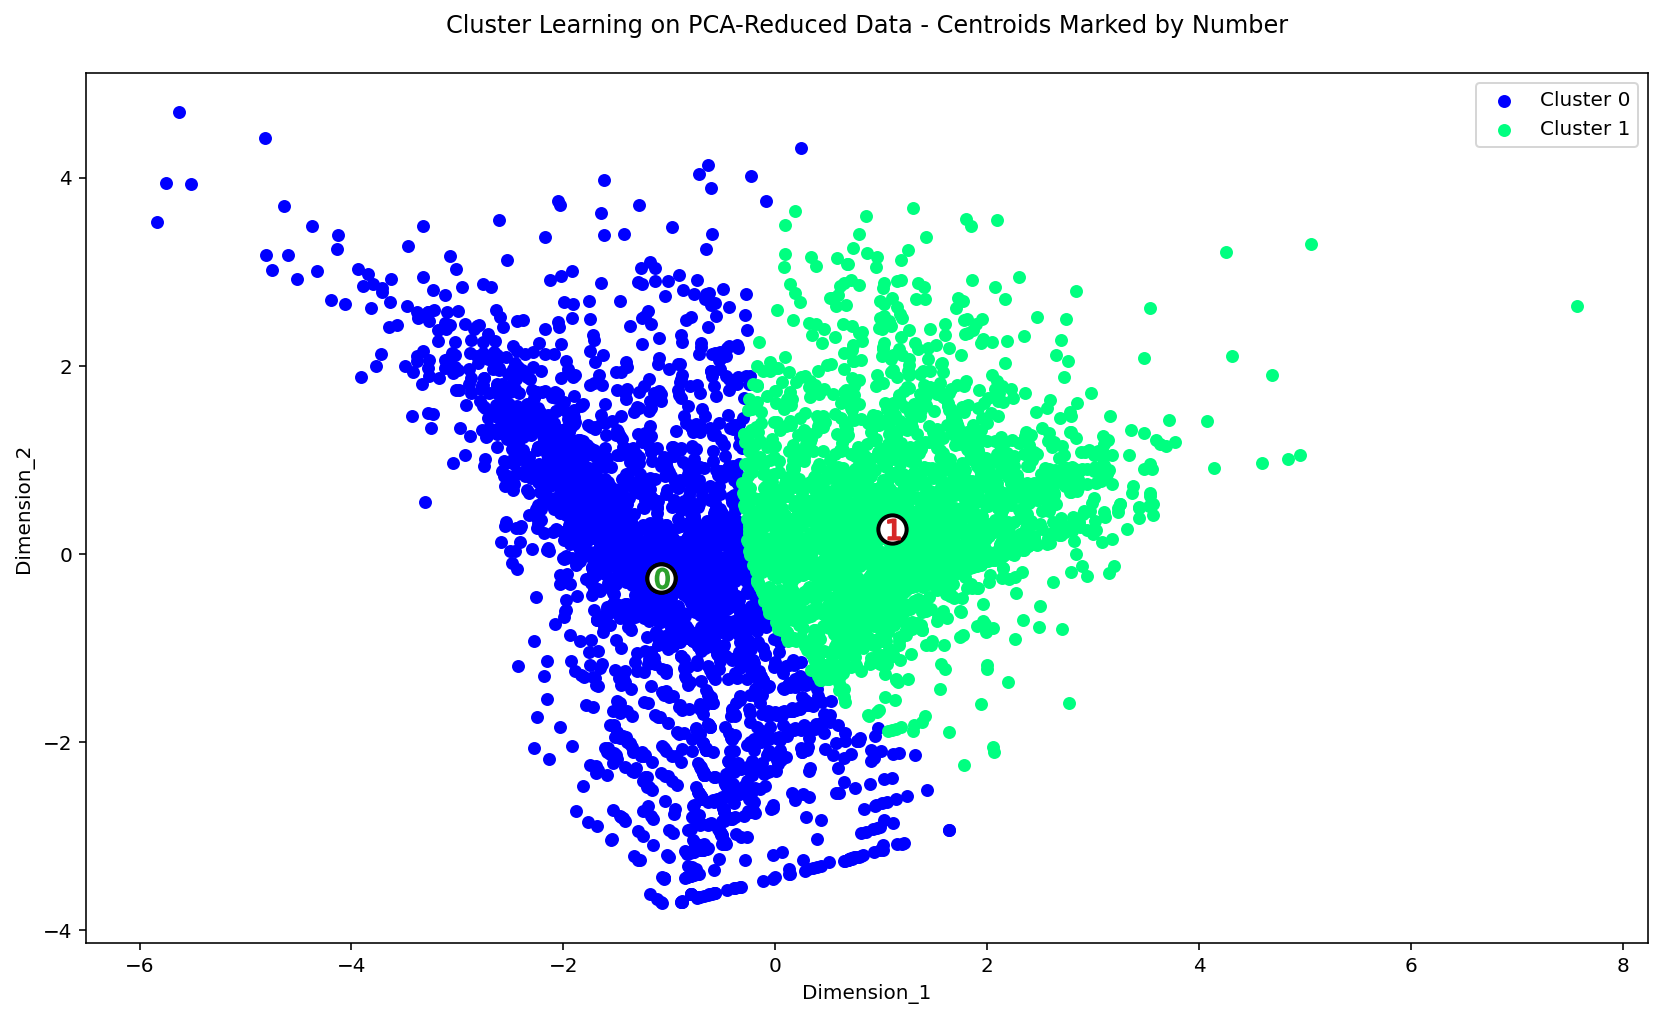

In [142]:
cluster_results(reduced_data_df, preds, centers)

### Recovering the features by Inversing the Transformations in Reverse Order

In [143]:
# Inverse transform the center
pca_rev_centers = pca_reduced.inverse_transform(centers)

In [144]:
unscaled_centers = scaler.inverse_transform(pca_rev_centers)

In [145]:
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
centers_df = pd.DataFrame(np.round(unscaled_centers), columns = creditcard_df[df_var.columns].keys())
centers_df.index = segments

In [146]:
centers_df

BALANCE  BALANCE_FREQUENCY  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Segment 0   1272.0                1.0                    27.0         828.0   
Segment 1    933.0                1.0                   532.0         152.0   

           PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  
Segment 0                  0.0                         0.0  
Segment 1                  1.0                         0.0

In [147]:
creditcard_df[df_var.columns].describe()

BALANCE  BALANCE_FREQUENCY  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count   8950.000000        8950.000000             8950.000000   8950.000000   
mean    1564.474828           0.877271              411.067645    978.871112   
std     2081.531879           0.236904              904.338115   2097.163877   
min        0.000000           0.000000                0.000000      0.000000   
25%      128.281915           0.888889                0.000000      0.000000   
50%      873.385231           1.000000               89.000000      0.000000   
75%     2054.140036           1.000000              468.637500   1113.821139   
max    19043.138560           1.000000            22500.000000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  
count          8950.000000                 8950.000000  
mean              0.490351                    0.202458  
std               0.401371                    0.298336  
min               0.000000                    0.000000  
25%               0.083333                    0.000000  
50%               0.500000                    0.083333  
75%               0.916667                    0.300000  
max               1.000000                    1.000000

## Conclusion:
Customers in segement 0 tend to:
 - have a balance higher that the population mean
 - have an installement_purchases about 10 smaller than the mean
 - have cash_advance on par with the mean
    
Customers in segement 1 tend to:
 - have a balance similar to the population mean
 - have an installement_purchases similar to the mean
 - have cash_advance lower than the mean
    